pip install timm torch transformers torchvision

In [2]:
from transformers import DetrImageProcessor, DetrForObjectDetection, AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torchvision.transforms as T
url = "http://images.cocodataset.org/val2017/000000039769.jpg"     

c:\Users\monic\.conda\envs\base (root)\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
import flask_cors

In [13]:
import torchvision

In [17]:
torch.__version__

'2.2.2+cu121'

In [2]:
# COCO classes
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

In [42]:
def plot_results(pil_img, prob, boxes, labels):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    for p, (xmin, ymin, xmax, ymax), c, label in zip(prob, boxes.tolist(), COLORS * 100, labels):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))

        text = f'{CLASSES[label]}: {p :0.4f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [43]:
processor = DetrImageProcessor.from_pretrained("detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("detr-resnet-50")

In [44]:
im = Image.open(requests.get(url, stream=True).raw)



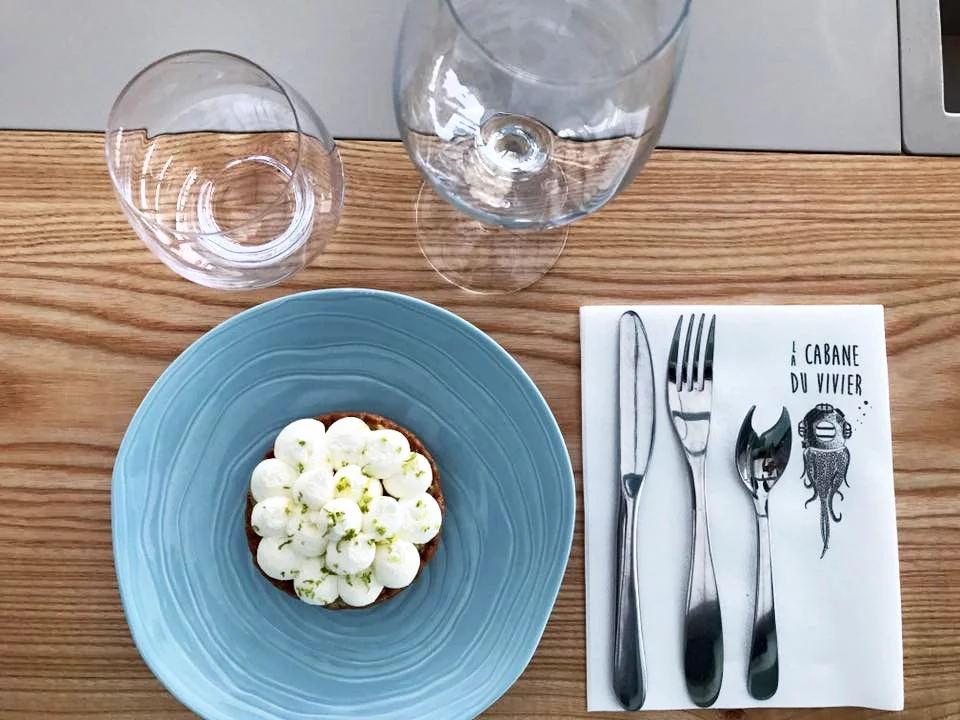

In [51]:
im2= Image.open('test_image.webp')
im2

In [52]:
inputs = processor(images=im2, return_tensors='pt')
outputs = model(**inputs)

In [53]:
target_sizes = torch.tensor([im2.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

In [54]:
results

{'scores': tensor([0.9715, 0.9448, 0.9969, 0.9925, 0.9615], grad_fn=<IndexBackward0>),
 'labels': tensor([50, 67, 48, 46, 49]),
 'boxes': tensor([[7.3085e+02, 4.0435e+02, 7.8742e+02, 6.9909e+02],
         [1.5750e-01, 1.3017e+02, 9.5972e+02, 7.1246e+02],
         [6.6598e+02, 3.1433e+02, 7.2234e+02, 7.0592e+02],
         [3.9224e+02, 6.3632e-01, 6.9406e+02, 3.0092e+02],
         [6.1029e+02, 3.0875e+02, 6.5817e+02, 7.1328e+02]],
        grad_fn=<IndexBackward0>)}

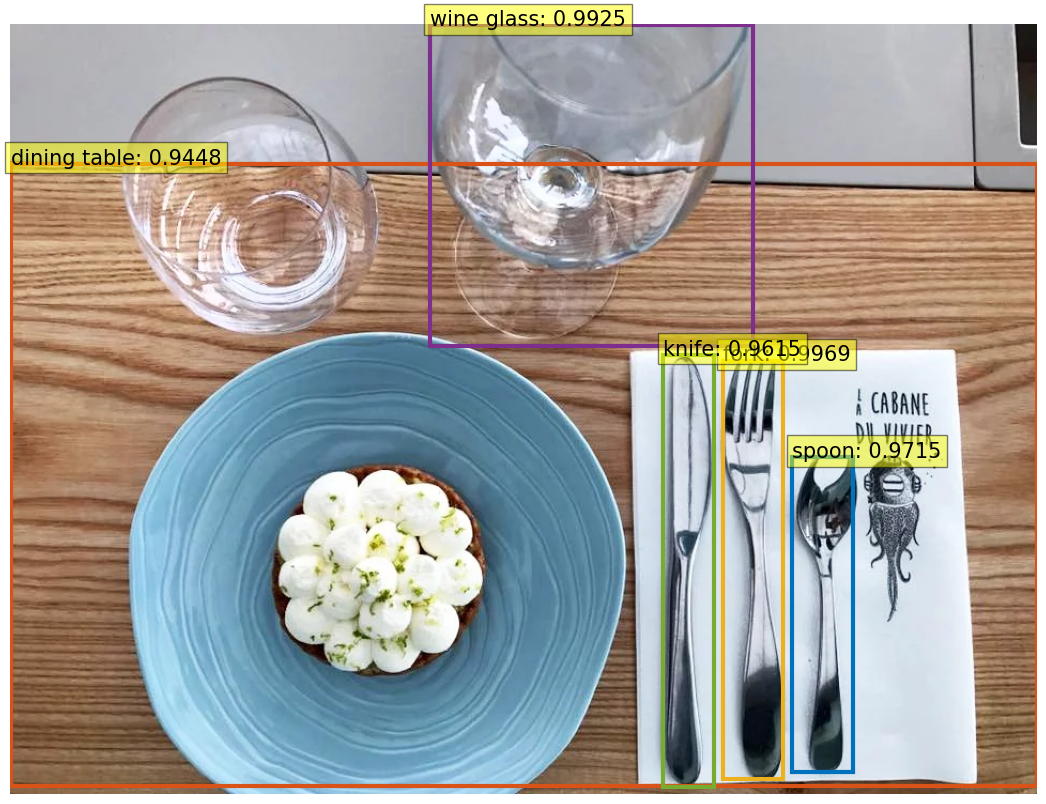

In [55]:
plot_results(im2, results['scores'], results['boxes'], results['labels'])

In [ ]:
impotr

In [3]:
import os

os.path.islink("https://www.geeksforgeeks.org/python-os-path-islink-method")

False

In [15]:
from transformers import DetrImageProcessor, DetrForObjectDetection, AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image
from urllib.request import urlopen
import requests
import os
import matplotlib.pyplot as plt
import pathlib

# BASE_PATH = pathlib.Path(__file__).parent
BASE_PATH = './'
MODEL = 'detr-resnet-50'

# COCO classes
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]


def plot_results(pil_img, prob, boxes, labels):
    fig = plt.figure(figsize=(16,10))
    
    ax = plt.gca()
    for p, (xmin, ymin, xmax, ymax), c, label in zip(prob, boxes.tolist(), COLORS * 100, labels):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))

        text = f'{CLASSES[label]}: {p :0.4f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.imshow(pil_img)
    fig.savefig('test.webp')


def process_image(image_link_or_path):
    processor = DetrImageProcessor.from_pretrained(os.path.join(BASE_PATH, MODEL))
    try:
        urlopen(image_link_or_path)
        image_data = requests.get(image_link_or_path).raw
    except : 
        image_data = image_link_or_path
    finally:
        image = Image.open(image_data)
        return image, processor

def predict(image, processor, threshold):
    model = DetrForObjectDetection.from_pretrained(os.path.join(BASE_PATH, MODEL))
    
    inputs = processor(images=image, return_tensors='pt')
    outputs = model(**inputs)

    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=threshold)[0]

    return plot_results(image, results['scores'], results['boxes'], results['labels'])


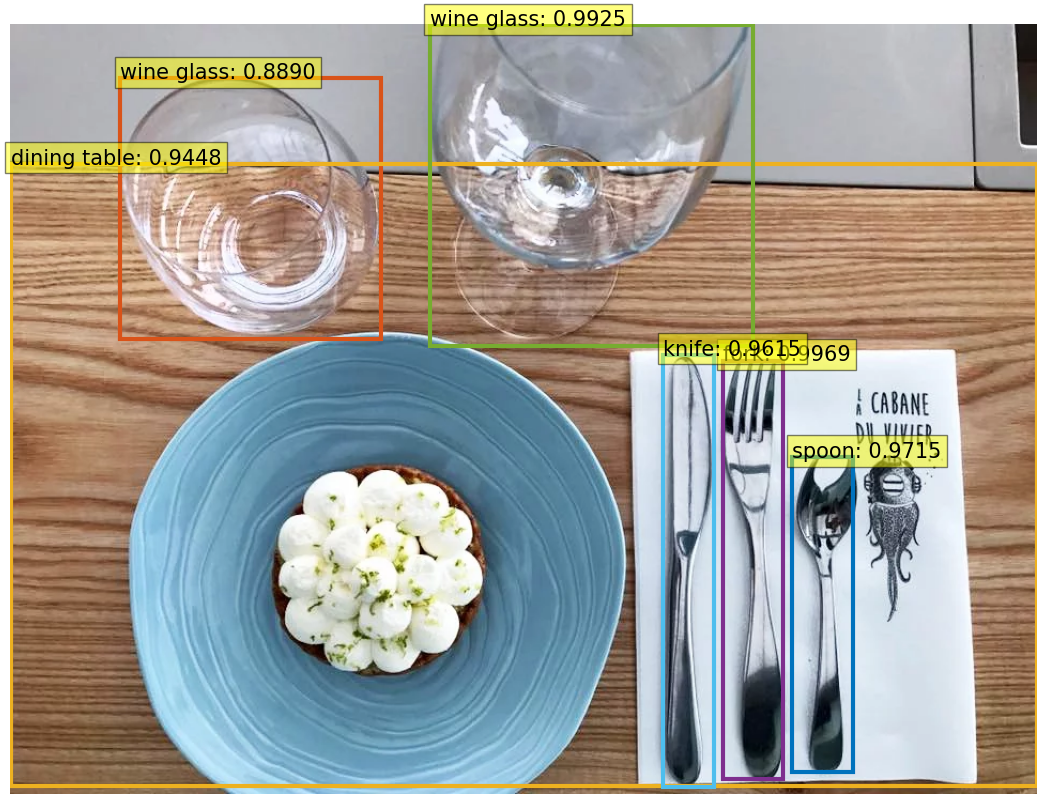

In [17]:
image, processor = process_image('test_image.webp')
predict(image, processor, 0.8)

In [4]:
import os
ALLOWED_EXTENSIONS = {".png", '.jpg', '.jpeg', '.webp', '.gif'}
def allowed_file(filename):
    return os.path.splitext(os.path.basename(filename))[1].lower() in ALLOWED_EXTENSIONS

In [6]:
allowed_file("https://i.ibb.co/dKmpyts/test-image.webz")

False